# Cluster de produtos

O objetivo do cluster de produtos e idenficar quais produtos sao similares e que nao deverao ser oferecido juntos.

Importacao das bibliotecas necessarias

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import transforms
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

pd.set_option('display.max_columns', None)

In [2]:
Dataset3 = pd.read_csv("../repository/renda_fixa_new.csv",sep=';')

Segue abaixo uma visualizacao dos dados que serao utilizadas no treinamento e teste.

In [3]:
Dataset3.head(5)

,DescontoIR__c,DescricaoCarencia__c,DescricaoEmissor__c,DescricaoProduto__c,DiasVencimento__c,FiltroValorMinimo__c,ProdutoId,RiscoAtivo__c,TaxaEmissao__c,TaxaPreEmissao__c,TipoIndexador__c,Indice_Basileia,Indice_Imobilizacao
0,15.0,No venc.,BANCO BS2 S.A.,CDB POS,1081.0,1000.0,a0W3u000009PC0MEAW,2.0,125.00,0.00,CDI,0.1132,0.1739
1,15.0,No venc.,BANCO INDUSVAL S.A.,CDB POS,721.0,5000.0,a0W3u000009PCASEA4,4.0,122.00,0.00,CDI,0.0197,1.0000
2,15.0,No venc.,BANCO ALFA S/A,CDB POS,721.0,5000.0,a0W3u000009PCAcEAO,2.0,103.25,0.00,CDI,0.2085,0.1440
3,15.0,No venc.,BANCO ALFA S/A,CDB POS,1081.0,5000.0,a0W3u000009PCArEAO,3.0,104.00,0.00,CDI,0.2085,0.1440
4,15.0,No venc.,BANCO PINE S.A.,CDB PRE,721.0,5000.0,a0W3u000009PCMNEA4,3.0,0.00,6.02,Pré fixado,0.1232,0.2278


Foi realizado um processo de limpeza, onde foi removido os campos descritivos e os que contêm informações pertinentes apenas ao registro em questão.

In [4]:
#dumizar, normalizar e manter variaveis que quero dumizar
produtos = Dataset3
produtos = produtos.drop(['DescricaoEmissor__c', 'ProdutoId'], axis=1)
# copiar colunas que quero manter antes de dumizar
#DescontoIR__c	DescricaoCarencia__c	DescricaoEmissor__c	DescricaoProduto__c	DiasVencimento__c	FiltroValorMinimo__c	RiscoAtivo__c	TaxaEmissao__c	TaxaPreEmissao__c	TipoIndexador__c


produtos = pd.get_dummies(produtos)
produtos

scaler = StandardScaler()
produtos['DiasVencimento_c_Scaler'] = 0
produtos['FiltroValorMinimo_c_Scaler'] = 0

produtos[['DiasVencimento_c_Scaler', 'FiltroValorMinimo_c_Scaler']] = scaler.fit_transform(produtos[['DiasVencimento__c', 'FiltroValorMinimo__c']])



In [5]:
produtos = produtos[['RiscoAtivo__c', 'Indice_Basileia', 'Indice_Imobilizacao','DiasVencimento_c_Scaler', 'FiltroValorMinimo_c_Scaler']]
produtos

,RiscoAtivo__c,Indice_Basileia,Indice_Imobilizacao,DiasVencimento_c_Scaler,FiltroValorMinimo_c_Scaler
0,2.0,0.1132,0.1739,0.435442,-0.929100
1,4.0,0.0197,1.0000,-0.234545,-0.034631
2,2.0,0.2085,0.1440,-0.234545,-0.034631
3,3.0,0.2085,0.1440,0.435442,-0.034631
4,3.0,0.1232,0.2278,-0.234545,-0.034631
...,...,...,...,...,...
221,2.0,0.2400,0.1179,-0.234545,-0.929100
222,2.0,0.2400,0.1179,0.435442,-0.929100
223,3.0,0.2400,0.1179,1.103567,-0.929100
224,3.0,0.2400,0.1179,1.777275,-0.929100


Foi separado os dados de treino e teste. 80% para treino e 20% para teste

In [6]:
produtos_train, produtos_test, Y_vazio, y_vazio = train_test_split(produtos, np.arange(0,226), test_size=0.20, random_state=42)

A quantidade de agrupamento que mais obteve sucesso foi 5 clusters.

In [7]:
Kmean = KMeans(n_clusters=5)

Kmean.fit(produtos_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
dfL = pd.DataFrame({'label': Kmean.labels_})
result = pd.concat([Dataset3, dfL], axis=1, join='inner')

result.groupby(['label'])['DescontoIR__c'].count()

label
0    53
1    32
2    35
3    29
4    31
Name: DescontoIR__c, dtype: int64

In [9]:
result[result['label'] == 2]
result.columns

Index(['DescontoIR__c', 'DescricaoCarencia__c', 'DescricaoEmissor__c',
       'DescricaoProduto__c', 'DiasVencimento__c', 'FiltroValorMinimo__c',
       'ProdutoId', 'RiscoAtivo__c', 'TaxaEmissao__c', 'TaxaPreEmissao__c',
       'TipoIndexador__c', 'Indice_Basileia', 'Indice_Imobilizacao', 'label'],
      dtype='object')

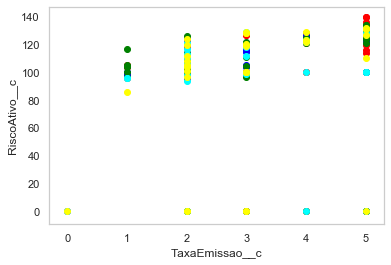

In [10]:
plt.scatter(result[result['label'] == 0].RiscoAtivo__c, result[result['label'] == 0].TaxaEmissao__c, c = 'red', label = 'Cluster 1')
plt.scatter(result[result['label'] == 1].RiscoAtivo__c, result[result['label'] == 1].TaxaEmissao__c, c = 'blue', label = 'Cluster 2')
plt.scatter(result[result['label'] == 2].RiscoAtivo__c, result[result['label'] == 2].TaxaEmissao__c, c = 'green', label = 'Cluster 3')
plt.scatter(result[result['label'] == 3].RiscoAtivo__c, result[result['label'] == 3].TaxaEmissao__c, c = 'cyan', label = 'Cluster 4')
plt.scatter(result[result['label'] == 4].RiscoAtivo__c, result[result['label'] == 4].TaxaEmissao__c, c = 'yellow', label = 'Cluster 5')
plt.xlabel('TaxaEmissao__c')
plt.ylabel('RiscoAtivo__c')
plt.show()


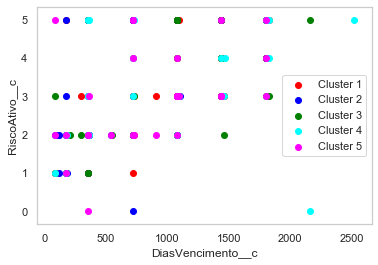

In [11]:
plt.scatter(result[result['label'] == 0].DiasVencimento__c, result[result['label'] == 0].RiscoAtivo__c, c = 'red', label = 'Cluster 1')
plt.scatter(result[result['label'] == 1].DiasVencimento__c, result[result['label'] == 1].RiscoAtivo__c, c = 'blue', label = 'Cluster 2')
plt.scatter(result[result['label'] == 2].DiasVencimento__c, result[result['label'] == 2].RiscoAtivo__c, c = 'green', label = 'Cluster 3')
plt.scatter(result[result['label'] == 3].DiasVencimento__c, result[result['label'] == 3].RiscoAtivo__c, c = 'cyan', label = 'Cluster 4')
plt.scatter(result[result['label'] == 4].DiasVencimento__c, result[result['label'] == 4].RiscoAtivo__c, c = 'magenta', label = 'Cluster 5')
plt.xlabel('DiasVencimento__c')
plt.ylabel('RiscoAtivo__c')
plt.legend()
plt.show()

In [12]:
Kmean = KMeans(n_clusters=5)

Kmean.fit(produtos)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
dfL = pd.DataFrame({'label': Kmean.labels_})
alldata = pd.concat([Dataset3, dfL], axis=1, join='inner')

groupByProduct = alldata
groupByProduct

,DescontoIR__c,DescricaoCarencia__c,DescricaoEmissor__c,DescricaoProduto__c,DiasVencimento__c,FiltroValorMinimo__c,ProdutoId,RiscoAtivo__c,TaxaEmissao__c,TaxaPreEmissao__c,TipoIndexador__c,Indice_Basileia,Indice_Imobilizacao,label
0,15.0,No venc.,BANCO BS2 S.A.,CDB POS,1081.0,1000.0,a0W3u000009PC0MEAW,2.0,125.00,0.00,CDI,0.1132,0.1739,4
1,15.0,No venc.,BANCO INDUSVAL S.A.,CDB POS,721.0,5000.0,a0W3u000009PCASEA4,4.0,122.00,0.00,CDI,0.0197,1.0000,2
2,15.0,No venc.,BANCO ALFA S/A,CDB POS,721.0,5000.0,a0W3u000009PCAcEAO,2.0,103.25,0.00,CDI,0.2085,0.1440,4
3,15.0,No venc.,BANCO ALFA S/A,CDB POS,1081.0,5000.0,a0W3u000009PCArEAO,3.0,104.00,0.00,CDI,0.2085,0.1440,0
4,15.0,No venc.,BANCO PINE S.A.,CDB PRE,721.0,5000.0,a0W3u000009PCMNEA4,3.0,0.00,6.02,Pré fixado,0.1232,0.2278,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,15.0,No venc.,PARANA BANCO S.A.,CDB POS,721.0,1000.0,a0W6A00000Aa9rZUAR,2.0,106.00,0.00,CDI,0.2400,0.1179,4
222,15.0,No venc.,PARANA BANCO S.A.,CDB POS,1081.0,1000.0,a0W6A00000Aa9reUAB,2.0,107.00,0.00,CDI,0.2400,0.1179,4
223,15.0,No venc.,PARANA BANCO S.A.,CDB POS,1440.0,1000.0,a0W6A00000Aa9rjUAB,3.0,109.00,0.00,CDI,0.2400,0.1179,0
224,15.0,No venc.,PARANA BANCO S.A.,CDB POS,1802.0,1000.0,a0W6A00000Aa9roUAB,3.0,110.00,0.00,CDI,0.2400,0.1179,0


In [14]:
groupByProduct.to_csv('../repository/produtos_groups_renda_fixa.csv')